# Trabajo Practico Nº1 - Parte 1: Procesos

## Información General

* **Universidad Nacional de la Matanza**
* Materia: Programación Concurrente
* Cuatrimestre: Segundo Cuatrimestre, Año 2024
* Profesores:
    * ADAGIO, MATIAS EZEQUIEL
    * CARNUCCIO, ESTEBAN
    * HIRSCHFELDT, DARIO
    * PALOMO, MAXIMO FACUNDO
    * VOLKER MARIANO LEONARDO
* Grupo: M4


* Integrantes:
    * ANTONIOLI, IVÁN OSCAR
    * DI NICCO, LUIS DEMETRIO
    * SANDOVAL VASQUEZ, JUAN LEANDRO
    * TIGANI MARTIN SEBASTIAN
    * VILLCA, LUIS ALBERTO

## Consigna

**Fecha de entrega**: 11/09/2024

**Forma de entrega**:
Se debe generar un informe que contenga los siguientes puntos:

*   **Carátula**: Con los integrantes del grupo.
*   **Link a un repositorio de GitHub**: En donde se encuentre el archivo del cuaderno de Colab generado para este Trabajo Práctico. Este archivo debe ser con la extension ipynb. También se debe subir a GitHub el código fuente.
*   **Conclusiones**: En esta sección se debe describir las dificultadas que encontraron al realizar el trabajo práctico.

Entregar el informe por plataforma de MIeL. Este debe ser en formato .pdf, con nombre TP1_NumeroDelGrupo.pdf.

**Enunciado**: Generar el siguiente árbol de procesos en los lenguajes: C, Java y Python.

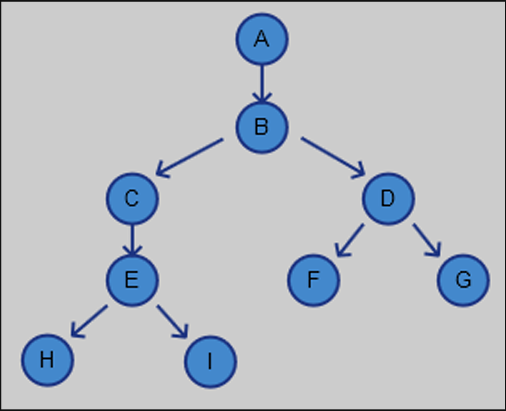

En cuanto a la creación, todos los procesos hijos deberán crearse con el enfoque de programación concurrente, es decir NO sería una solución válida crear un proceso y esperar a que éste finalice para crear el siguiente.

**Nota**: Pausar o retrasar la finalización del programa para que el equipo docente pueda verificar la correcta creación del árbol.

## Criterios a tener en cuenta

* [Coding Standard](https://google.github.io/styleguide/)
* Ajustes específicos (Ej. llaves en la misma columna)
* Espacios en lugar de tabulaciones (2 espacios)
* Métodos/funciones con menos de 15 líneas.
* Patrones de diseño
* No debe haber números mágicos, uso de constantes descriptivas.

# Resolución

## Arbol De Procesos en C

### Código

In [ ]:
%%writefile arbolDeProcesos.c
#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <sys/wait.h>

#define ERROR_CREACION_PROCESO 2
#define TIEMPO_DE_ESPERA_PARA_MOSTRAR_ARBOL 10

pid_t crearProceso(char nombre);
void manejarProcesoA();
void manejarProcesoB();
void manejarProcesoC();
void manejarProcesoD();
void manejarProcesoE();
void manejarProcesoHoja();
int main();

pid_t crearProceso(char nombre)
{
  pid_t pid = fork();
  if (pid < 0)
  {
    return ERROR_CREACION_PROCESO;
  }
  if (pid == 0)
  {
    printf("Proceso %c: %d\n", nombre, getpid());
    fflush(stdout);
  }
  return pid;
}

void manejarProcesoA()
{
  pid_t pid_b = crearProceso('B');
  if (pid_b != 0)
  {
    printf("Proceso A: %d\n", getpid());
    wait(NULL);
    exit(0);
  }
  else
  {
    manejarProcesoB();
  }
}

void manejarProcesoB()
{
  pid_t pid_c = crearProceso('C');
  if (pid_c != 0)
  {
    manejarProcesoD();
    wait(NULL);
    wait(NULL);
    exit(0);
  }
  else
  {
    manejarProcesoC();
  }
}

void manejarProcesoC()
{
  pid_t pid_e = crearProceso('E');
  if (pid_e == 0)
  {
    manejarProcesoE();
  }
  else
  {
    wait(NULL);
    exit(0);
  }
}

void manejarProcesoD()
{
  pid_t pid_d = crearProceso('D');
  if (pid_d == 0)
  {
    pid_t pid_f = crearProceso('F');
    if (pid_f != 0)
    {
      pid_t pid_g = crearProceso('G');
      if (pid_g != 0)
      {
        wait(NULL);
        wait(NULL);
        exit(0);
      }
      else
      {
        manejarProcesoHoja();
      }
    }
    else
    {
        manejarProcesoHoja();
    }
  }
}

void manejarProcesoE()
{
  pid_t pid_h = crearProceso('H');
  if (pid_h != 0)
  {
    pid_t pid_i = crearProceso('I');
    if (pid_i != 0)
    {
      wait(NULL);
      wait(NULL);
      exit(0);
    }
    else
    {
      manejarProcesoHoja();
    }
  }
  else
  {
    manejarProcesoHoja();
  }
}

void manejarProcesoHoja()
{
  sleep(TIEMPO_DE_ESPERA_PARA_MOSTRAR_ARBOL);
  exit(0);
}

int main()
{
  manejarProcesoA();
  return 0;
}

Overwriting arbolDeProcesos.c


### Compilación

Compilacion del script para generar el Arbol de Procesos

***Nota***: Llamamos al ejecutable arbolC para que al ejecutar el comando pstree se llegue a ver el arbol completo

In [ ]:
!gcc -o arbolC.bin arbolDeProcesos.c

### Ejecución

Ejecucion en segundo plano del script para generar el Arbol de Procesos

In [ ]:
!nohup ./arbolC.bin 1>salidaC 2>/dev/null &

### Visualización del Arbol de Procesos

#### Comando para obtener el PID del Arbol de Procesos

In [ ]:
!ps -ef | grep arbolC.bin

root       25621       1  0 17:04 ?        00:00:00 ./arbolC.bin
root       25622   25621  0 17:04 ?        00:00:00 ./arbolC.bin
root       25623   25622  0 17:04 ?        00:00:00 ./arbolC.bin
root       25624   25622  0 17:04 ?        00:00:00 ./arbolC.bin
root       25625   25623  0 17:04 ?        00:00:00 ./arbolC.bin
root       25626   25624  0 17:04 ?        00:00:00 ./arbolC.bin
root       25627   25624  0 17:04 ?        00:00:00 ./arbolC.bin
root       25628   25625  0 17:04 ?        00:00:00 ./arbolC.bin
root       25629   25625  0 17:04 ?        00:00:00 ./arbolC.bin
root       25646     193  0 17:04 ?        00:00:00 /bin/bash -c ps -ef | grep arbolC.bin
root       25648   25646  0 17:04 ?        00:00:00 grep arbolC.bin


#### Comando para mostrar el Arbol de Procesos

***Nota***: Se debe actualizar manualmente el parametro del PID en base al PID actual del script que genera el arbol de procesos.

Se puede encontrar de la siguiente manera, tiene la siguiente estructura:

root    XXXX       1  0 15:36 ?        00:00:00 ./arbolC.bin

Se debe copiar el valor que esta en XXXX en la celda de abajo

In [ ]:
!pstree -p 25621

arbolC.bin(25621)───arbolC.bin(25622)─┬─arbolC.bin(25623)───arbolC.bin(25625)─┬─arbolC.bin(25628)
                                      │                                       └─arbolC.bin(25629)
                                      └─arbolC.bin(25624)─┬─arbolC.bin(25626)
                                                          └─arbolC.bin(25627)


Otro comando para mostrar el árbol sin visualizar el PID

In [ ]:
!pstree -pTc $(pgrep -f "arbolC.bin" | head -1)

arbolC.bin(25727)───arbolC.bin(25728)─┬─arbolC.bin(25729)───arbolC.bin(25733)─┬─arbolC.bin(25734)
                                      │                                       └─arbolC.bin(25735)
                                      └─arbolC.bin(25730)─┬─arbolC.bin(25731)
                                                          └─arbolC.bin(25732)


#### Alternativa para visualizar dinamicamente el arbol de procesos

##### Código

In [ ]:
%%writefile monitorear_proceso.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <unistd.h>

#define TIEMPO_DE_ESPERA 2
#define TAMANO_COMANDO 256
#define TAMANO_PID 16

char* ObtenerPidProceso(const char* nombre_proceso);
int ProcesoSigueCorriendo(const char* pid);
void MostrarArbolDeProcesos(const char* pid);
void MonitorearProceso(void);

char* ObtenerPidProceso(const char* nombre_proceso)
{
  static char pid[TAMANO_PID];
  FILE* fp;
  char comando[TAMANO_COMANDO];

  // Comando para obtener el PID
  snprintf(comando, sizeof(comando), "pgrep -f \"%s\"", nombre_proceso);
  fp = popen(comando, "r");

  if (fp == NULL)
  {
    printf("Error al ejecutar pgrep\n");
    return NULL;
  }

  if (fgets(pid, sizeof(pid), fp) != NULL)
  {
    // Eliminar el salto de línea
    pid[strcspn(pid, "\n")] = '\0';
    pclose(fp);
    return pid;
  }
  else
  {
    printf("Proceso no encontrado.\n");
    pclose(fp);
    return NULL;
  }
}

int ProcesoSigueCorriendo(const char* pid)
{
  char comando[TAMANO_COMANDO];
  snprintf(comando, sizeof(comando), "ps -p %s > /dev/null", pid);
  return system(comando) == 0;
}

void MostrarArbolDeProcesos(const char* pid)
{
  char comando[TAMANO_COMANDO];
  snprintf(comando, sizeof(comando), "pstree -pc %s", pid);
  system(comando);
}

void MonitorearProceso(void)
{
  const char* nombre_proceso = "arbolC.bin";
  char* pid = ObtenerPidProceso(nombre_proceso);

  if (pid == NULL)
  {
    return;
  }

  while (ProcesoSigueCorriendo(pid))
  {
    MostrarArbolDeProcesos(pid);
    sleep(TIEMPO_DE_ESPERA);
  }

  fflush(stdout);
  printf("El proceso ha terminado.\n");
}

int main(void)
{
  MonitorearProceso();
  return 0;
}

Overwriting monitorear_proceso.c


##### Compilación

In [ ]:
!gcc monitorear_proceso.c -o monitorear_proceso.bin

##### Ejecución

In [ ]:
!./monitorear_proceso.bin

arbolC.bin(16970)───arbolC.bin(16971)─┬─arbolC.bin(16972)───arbolC.bin(16974)─┬─arbolC.bin(16977)
                                      │                                       └─arbolC.bin(16978)
                                      └─arbolC.bin(16973)─┬─arbolC.bin(16975)
                                                          └─arbolC.bin(16976)
arbolC.bin(16970)───arbolC.bin(16971)─┬─arbolC.bin(16972)───arbolC.bin(16974)─┬─arbolC.bin(16977)
                                      │                                       └─arbolC.bin(16978)
                                      └─arbolC.bin(16973)─┬─arbolC.bin(16975)
                                                          └─arbolC.bin(16976)
El proceso ha terminado.


#### Visualizacion de como quedó el archivo de salida

In [ ]:
!cat salidaC

Proceso B: 16989
Proceso D: 16991
Proceso C: 16990
Proceso G: 16993
Proceso F: 16992
Proceso E: 16994
Proceso I: 16996
Proceso H: 16995
Proceso A: 16988
